In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import pandas as pd
import plotly.express as px
from datetime import datetime
from datetime import timedelta
from matplotlib.backends.backend_pdf import PdfPages
from tqdm import tqdm
import logging
import plotly.figure_factory as ff
import os


%run /Users/20008624/Library/CloudStorage/OneDrive-UPLLimited/Documents/All_function_list.ipynb
import seaborn as sns
%matplotlib inline

import plotly.express as px
import plotly.graph_objs as go
import plotly
import plotly.offline as pyo
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

import plotly.offline as pyo
import plotly.graph_objs as go
from bokeh.plotting import *
from bokeh.models import *
from bokeh.plotting import figure, show
from bokeh.models import LinearAxis, Range1d, Legend
import bokeh.io
bokeh.io.reset_output()
# bokeh.io.output_notebook()

import datetime
from datetime import datetime

pd.set_option('display.float_format', lambda x: f'{x:.3f}')

# Import 1st Data frame of records 

In [2]:
os.chdir('/Users/20008624/Library/CloudStorage/OneDrive-UPLLimited/Data backup/Drive-E/All my courses/Project/Credit Card Approval Prediction/data')
df = pd.read_csv('application_record.csv')

In [3]:
display(data_overview(df))
display(classify_features(df))

Data information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Columns: 18 entries, ID to CNT_FAM_MEMBERS
dtypes: float64(2), int64(8), object(8)
memory usage: 60.2+ MB
Missing Data values:
OCCUPATION_TYPE    134203
dtype: int64


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.000,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.000
1,5008805,M,Y,Y,0,427500.000,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.000


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
438555,6842765,F,N,Y,0,72000.000,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.000
438556,6842885,F,N,Y,0,121500.000,Working,Secondary / secondary special,Married,House / apartment,-18858,-1201,1,0,1,0,Sales staff,2.000


,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,438557.000,438557.000,438557.000,438557.000,438557.000,438557.000,438557.000,438557.000,438557.000,438557.000
mean,6022176.270,0.427,187524.286,-15997.905,60563.675,1.000,0.206,0.288,0.108,2.194
std,571637.023,0.725,110086.853,4185.030,138767.800,0.000,0.405,0.453,0.311,0.897
min,5008804.000,0.000,26100.000,-25201.000,-17531.000,1.000,0.000,0.000,0.000,1.000
10%,5181104.600,0.000,90000.000,-21982.000,-5295.000,1.000,0.000,0.000,0.000,1.000
25%,5609375.000,0.000,121500.000,-19483.000,-3103.000,1.000,0.000,0.000,0.000,2.000
50%,6047745.000,0.000,160780.500,-15630.000,-1467.000,1.000,0.000,0.000,0.000,2.000
75%,6456971.000,1.000,225000.000,-12514.000,-371.000,1.000,0.000,1.000,0.000,3.000
90%,6722595.400,2.000,315000.000,-10519.000,365243.000,1.000,1.000,1.000,1.000,3.000
max,7999952.000,19.000,6750000.000,-7489.000,365243.000,1.000,1.000,1.000,1.000,20.000


'Shape of dataframe (438557, 18)'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

'Info of dataframe None'

None

Categorical Features: ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE'] length: 7
Non-Categorical Features: ['OCCUPATION_TYPE'] length: 1
Discrete Features: ['FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL'] length: 4
Continuous Features: ['ID', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'CNT_FAM_MEMBERS'] length: 6


None

In [4]:
df['ID'].duplicated().sum()

47

In [5]:
df.shape

(438557, 18)

In [6]:
df.columns[1:]

Index(['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS'],
      dtype='object')

<Axes: ylabel='AMT_INCOME_TOTAL'>

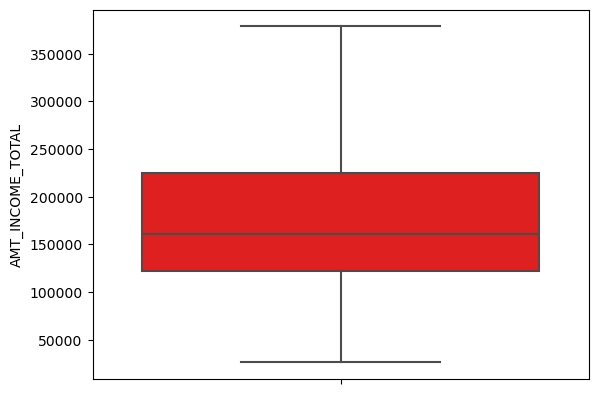

In [7]:
sns.boxplot(data=df, y= 'AMT_INCOME_TOTAL',color='r', showfliers=False)

<Axes: ylabel='CNT_CHILDREN'>

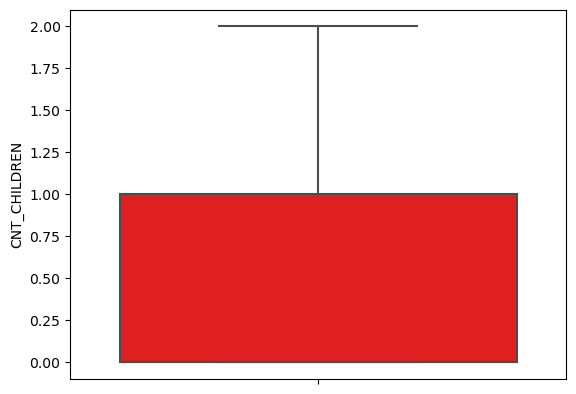

In [8]:
sns.boxplot(data=df, y= 'CNT_CHILDREN',color='r', showfliers=False)

In [9]:
df.drop(columns=["FLAG_MOBIL"],inplace=True)

In [10]:
df.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS'],
      dtype='object')

In [11]:
columns_to_scale = ['CNT_CHILDREN','AMT_INCOME_TOTAL', 'DAYS_BIRTH','DAYS_EMPLOYED', 'CNT_FAM_MEMBERS']

In [12]:
classify_features(df)

Categorical Features: ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE'] length: 7
Non-Categorical Features: ['OCCUPATION_TYPE'] length: 1
Discrete Features: ['FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL'] length: 3
Continuous Features: ['ID', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'CNT_FAM_MEMBERS'] length: 6


In [13]:
from sklearn.model_selection import KFold, cross_val_score,train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [14]:
st = StandardScaler()
df[columns_to_scale]= st.fit_transform(df[columns_to_scale])

In [15]:
df[columns_to_scale].head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS
0,-0.590,2.180,0.954,-0.469,-0.217
1,-0.590,2.180,0.954,-0.469,-0.217
2,-0.590,-0.682,-1.308,-0.445,-0.217
3,-0.590,0.749,-0.744,-0.458,-1.331
4,-0.590,0.749,-0.744,-0.458,-1.331


In [16]:
columns_to_encode = ['CODE_GENDER','FLAG_OWN_CAR','NAME_EDUCATION_TYPE', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE']
df=pd.get_dummies(df,columns=columns_to_encode,dtype='int')

In [17]:
df.head()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,CODE_GENDER_F,CODE_GENDER_M,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Working,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,FLAG_WORK_PHONE_0,FLAG_WORK_PHONE_1,FLAG_PHONE_0,FLAG_PHONE_1,FLAG_EMAIL_0,FLAG_EMAIL_1,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff
0,5008804,-0.590,2.180,0.954,-0.469,-0.217,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5008805,-0.590,2.180,0.954,-0.469,-0.217,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,5008806,-0.590,-0.682,-1.308,-0.445,-0.217,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,5008808,-0.590,0.749,-0.744,-0.458,-1.331,1,0,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,5008809,-0.590,0.749,-0.744,-0.458,-1.331,1,0,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


# Import 2nd Data frame of records 

In [18]:
df1 = pd.read_csv('/Users/20008624/Library/CloudStorage/OneDrive-UPLLimited/Data backup/Drive-E/All my courses/Project/Credit Card Approval Prediction/data/credit_record.csv')

In [19]:
data_overview(df1)

Data information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Columns: 3 entries, ID to STATUS
dtypes: int64(2), object(1)
memory usage: 24.0+ MB
Missing Data values:
Series([], dtype: int64)


,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0


,ID,MONTHS_BALANCE,STATUS
1048573,5150487,-28,C
1048574,5150487,-29,C


,ID,MONTHS_BALANCE
count,1048575.000,1048575.000
mean,5068286.425,-19.137
std,46150.579,14.023
min,5001711.000,-60.000
10%,5009545.000,-40.000
25%,5023644.000,-29.000
50%,5062104.000,-17.000
75%,5113856.000,-7.000
90%,5135448.000,-3.000
max,5150487.000,0.000


'Shape of dataframe (1048575, 3)'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


'Info of dataframe None'

In [20]:
df1.duplicated().sum()

0

In [21]:
df1.STATUS.unique()

array(['X', '0', 'C', '1', '2', '3', '4', '5'], dtype=object)

In [22]:
df1['target']=df1['STATUS']
df1['target'].replace('X', 0, inplace=True)
df1['target'].replace('C', 0, inplace=True)
df1['target']=df1['target'].astype(int)

In [23]:
df1.target.value_counts()

0    1034381
1      11090
5       1693
2        868
3        320
4        223
Name: target, dtype: int64

In [24]:
df1.loc[df1['target']>=1,'target']=1

In [25]:
df2=pd.DataFrame(df1.groupby(['ID'])['target'].agg("max")).reset_index()
new_df = pd.merge(df,df2,how='inner',on=['ID'])

In [26]:
new_df['ID'].duplicated().sum()

0

In [27]:
new_df.head()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,CODE_GENDER_F,CODE_GENDER_M,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Working,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,FLAG_WORK_PHONE_0,FLAG_WORK_PHONE_1,FLAG_PHONE_0,FLAG_PHONE_1,FLAG_EMAIL_0,FLAG_EMAIL_1,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,target
0,5008804,-0.590,2.180,0.954,-0.469,-0.217,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,5008805,-0.590,2.180,0.954,-0.469,-0.217,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,5008806,-0.590,-0.682,-1.308,-0.445,-0.217,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,5008808,-0.590,0.749,-0.744,-0.458,-1.331,1,0,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,5008809,-0.590,0.749,-0.744,-0.458,-1.331,1,0,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [28]:
# Extract how many months account has been open for
start_df=(df1.groupby(['ID'])['MONTHS_BALANCE'].agg(min,)).to_frame()
# Rename column
start_df.rename(columns={'MONTHS_BALANCE':'ACCOUNT_LENGTH'}, inplace=True)

# Make entries positive
start_df['ACCOUNT_LENGTH']=-start_df['ACCOUNT_LENGTH']

In [29]:
new_df = pd.merge(new_df, start_df,how='inner',on=['ID'])

In [30]:
new_df.head()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,CODE_GENDER_F,CODE_GENDER_M,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Working,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,FLAG_WORK_PHONE_0,FLAG_WORK_PHONE_1,FLAG_PHONE_0,FLAG_PHONE_1,FLAG_EMAIL_0,FLAG_EMAIL_1,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,target,ACCOUNT_LENGTH
0,5008804,-0.590,2.180,0.954,-0.469,-0.217,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,15
1,5008805,-0.590,2.180,0.954,-0.469,-0.217,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,14
2,5008806,-0.590,-0.682,-1.308,-0.445,-0.217,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,29
3,5008808,-0.590,0.749,-0.744,-0.458,-1.331,1,0,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,4
4,5008809,-0.590,0.749,-0.744,-0.458,-1.331,1,0,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,26


In [31]:
new_df.drop(columns=["ID"],inplace=True)

In [32]:
x = new_df.drop(columns=['target'])
y = new_df['target']

# ML

## LogisticRegression

In [33]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.25,stratify=y,random_state=0)

In [73]:
lr = LogisticRegression(random_state=0,C=3)
lr.fit(x_train,y_train)

LogisticRegression(C=3, random_state=0)

In [74]:
lr.score(x_train,y_train)

0.8823056104162095

In [75]:
lr.score(x_test,y_test)

0.8822819528250138

In [76]:
from sklearn.metrics import confusion_matrix,classification_report
y_pred = lr.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[8042    0]
 [1073    0]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.94      8042
           1       0.00      0.00      0.00      1073

    accuracy                           0.88      9115
   macro avg       0.44      0.50      0.47      9115
weighted avg       0.78      0.88      0.83      9115



In [81]:
y_pred1 = lr.predict(x_train)
print(confusion_matrix(y_train,y_pred1))
print(classification_report(y_train,y_pred1))

[[24124     0]
 [ 3218     0]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.94     24124
           1       0.00      0.00      0.00      3218

    accuracy                           0.88     27342
   macro avg       0.44      0.50      0.47     27342
weighted avg       0.78      0.88      0.83     27342



## pycaret

In [77]:
import pycaret
# from pycaret.regression import compare_models, eda
# from pycaret.regression import *
# from pycaret.regression import create_model
from pycaret.classification import *

In [79]:
from pycaret.classification import ClassificationExperiment
exp = ClassificationExperiment()
exp.setup(data=new_df, target = 'target', session_id = 123, train_size=0.8,
          feature_selection_method='sequential',verbose=1, normalize=True, normalize_method='robust',
          remove_outliers=True,outliers_threshold=0.01,
         n_features_to_select=30)

,Description,Value
0,Session id,123
1,Target,target
2,Target type,Binary
3,Original data shape,"(36457, 58)"
4,Transformed data shape,"(36166, 58)"
5,Transformed train set shape,"(28874, 58)"
6,Transformed test set shape,"(7292, 58)"
7,Numeric features,57
8,Preprocess,True
9,Imputation type,simple


In [80]:
# compare baseline models
best = exp.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.8865,0.7021,0.0556,0.7387,0.1031,0.0882,0.1811,1.2970
xgboost,Extreme Gradient Boosting,0.8860,0.7101,0.0836,0.6223,0.1469,0.1224,0.1976,0.7970
lightgbm,Light Gradient Boosting Machine,0.8839,0.6824,0.0256,0.6892,0.0493,0.0411,0.1160,0.2040
lda,Linear Discriminant Analysis,0.8829,0.5767,0.0052,0.9000,0.0104,0.0092,0.0633,0.1020
lr,Logistic Regression,0.8827,0.5770,0.0038,0.9000,0.0075,0.0067,0.0540,0.8030
ridge,Ridge Classifier,0.8827,0.0000,0.0038,0.9000,0.0075,0.0067,0.0540,0.0530
gbc,Gradient Boosting Classifier,0.8825,0.6221,0.0041,0.5367,0.0081,0.0067,0.0400,0.4940
svm,SVM - Linear Kernel,0.8824,0.0000,0.0009,0.3000,0.0017,0.0015,0.0152,0.1620
ada,Ada Boost Classifier,0.8823,0.5905,0.0000,0.0000,0.0000,0.0000,0.0000,0.1750
dummy,Dummy Classifier,0.8823,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0840


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

## DecisionTree

In [34]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0,criterion='gini',max_depth=30)
dt.fit(x_train,y_train)

In [66]:
dt.score(x_train,y_train),dt.score(x_test,y_test)

(0.9826640333552776, 0.8388370817334064)

In [67]:
params={
    "criterion":["gini", "entropy"],
"max_depth": [5,7,9,10,11],
"min_samples_split" :[10,15,20,50,100,200,250],
"min_samples_leaf" : [5,10,15,20,50,80,100]}
from sklearn.model_selection import RandomizedSearchCV
rs_dt = RandomizedSearchCV(DecisionTreeClassifier(random_state=0),param_distributions=params,cv=10,n_jobs=2)
rs_dt.fit(x_train,y_train)

RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=0),
                   n_jobs=2,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 7, 9, 10, 11],
                                        'min_samples_leaf': [5, 10, 15, 20, 50,
                                                             80, 100],
                                        'min_samples_split': [10, 15, 20, 50,
                                                              100, 200, 250]})

In [68]:
rs_dt.score(x_train,y_train),rs_dt.score(x_test,y_test)

(0.8823056104162095, 0.8822819528250138)

In [69]:
y_pred = rs_dt.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[8042    0]
 [1073    0]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.94      8042
           1       0.00      0.00      0.00      1073

    accuracy                           0.88      9115
   macro avg       0.44      0.50      0.47      9115
weighted avg       0.78      0.88      0.83      9115



In [70]:
y_pred1 = rs_dt.predict(x_train)
print(confusion_matrix(y_train,y_pred1))
print(classification_report(y_train,y_pred1))

[[24124     0]
 [ 3218     0]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.94     24124
           1       0.00      0.00      0.00      3218

    accuracy                           0.88     27342
   macro avg       0.44      0.50      0.47     27342
weighted avg       0.78      0.88      0.83     27342



## RandomForest

In [35]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=0)

In [72]:
rf.fit(x_train,y_train)

RandomForestClassifier(random_state=0)

In [73]:
rf.score(x_train,y_train),rf.score(x_test,y_test)

(0.9898324921366396, 0.8788809654415798)

In [52]:
parameters={"criterion":['gini', 'entropy'],
           "max_depth":[5,7,9,11,13],
           "min_samples_split":[2,5,8,10,15,20],
           "min_samples_leaf":[1,2,5,8,10],
           "n_estimators":[50,100,150,200,300],
           "bootstrap":[True],
           "max_features":["sqrt","log2"],
           "max_samples":[.5,.6,.75,.8,.9]}
rs_rf = RandomizedSearchCV(RandomForestClassifier(random_state=0),param_distributions=parameters,cv=10,n_jobs=-1)
rs_rf.fit(x_train,y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(random_state=0),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 7, 9, 11, 13],
                                        'max_features': ['sqrt', 'log2'],
                                        'max_samples': [0.5, 0.6, 0.75, 0.8,
                                                        0.9],
                                        'min_samples_leaf': [1, 2, 5, 8, 10],
                                        'min_samples_split': [2, 5, 8, 10, 15,
                                                              20],
                                        'n_estimators': [50, 100, 150, 200,
                                                         300]})

In [53]:
rs_rf.score(x_train,y_train),rs_rf.score(x_test,y_test)

(0.8823056104162095, 0.8822819528250138)

In [74]:
y_pred1 = rs_rf.predict(x_train)
print(confusion_matrix(y_train,y_pred1))
print(classification_report(y_train,y_pred1))

[[24124     0]
 [ 3218     0]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.94     24124
           1       0.00      0.00      0.00      3218

    accuracy                           0.88     27342
   macro avg       0.44      0.50      0.47     27342
weighted avg       0.78      0.88      0.83     27342



In [85]:
pd.DataFrame(rf.feature_importances_,rf.feature_names_in_ 
             )

,0
CNT_CHILDREN,0.020
AMT_INCOME_TOTAL,0.105
DAYS_BIRTH,0.143
DAYS_EMPLOYED,0.103
CNT_FAM_MEMBERS,0.025
CODE_GENDER_F,0.008
CODE_GENDER_M,0.008
FLAG_OWN_CAR_N,0.010
FLAG_OWN_CAR_Y,0.010
NAME_EDUCATION_TYPE_Academic degree,0.001


## GradientBoosting

In [36]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=0)
gb.fit(x_train,y_train)

GradientBoostingClassifier(random_state=0)

In [87]:
gb.score(x_train,y_train),gb.score(x_test,y_test)

(0.8831102333406481, 0.8825013713658805)

In [88]:
y_pred = gb.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[8038    4]
 [1067    6]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.94      8042
           1       0.60      0.01      0.01      1073

    accuracy                           0.88      9115
   macro avg       0.74      0.50      0.47      9115
weighted avg       0.85      0.88      0.83      9115



In [89]:
y_pred1 = gb.predict(x_train)
print(confusion_matrix(y_train,y_pred1))
print(classification_report(y_train,y_pred1))

[[24124     0]
 [ 3196    22]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.94     24124
           1       1.00      0.01      0.01      3218

    accuracy                           0.88     27342
   macro avg       0.94      0.50      0.48     27342
weighted avg       0.90      0.88      0.83     27342



In [90]:
## hyperparameter tuning
params = {
    'max_depth': [2,3,5,10],
    'min_samples_leaf': [2,5,10,20,50],
    'n_estimators': [10,15,20,30],
    'learning_rate': [0.1,0.2,0.3,0.4,0.5]
}
rs_gb = RandomizedSearchCV(GradientBoostingClassifier(random_state=0),param_distributions=params,cv=10,n_jobs=2)
rs_gb.fit(x_train,y_train)

RandomizedSearchCV(cv=10, estimator=GradientBoostingClassifier(random_state=0),
                   n_jobs=2,
                   param_distributions={'learning_rate': [0.1, 0.2, 0.3, 0.4,
                                                          0.5],
                                        'max_depth': [2, 3, 5, 10],
                                        'min_samples_leaf': [2, 5, 10, 20, 50],
                                        'n_estimators': [10, 15, 20, 30]})

In [91]:
y_pred = rs_gb.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[8027   15]
 [1047   26]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.94      8042
           1       0.63      0.02      0.05      1073

    accuracy                           0.88      9115
   macro avg       0.76      0.51      0.49      9115
weighted avg       0.86      0.88      0.83      9115



In [92]:
y_pred1 = rs_gb.predict(x_train)
print(confusion_matrix(y_train,y_pred1))
print(classification_report(y_train,y_pred1))

[[24104    20]
 [ 3035   183]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     24124
           1       0.90      0.06      0.11      3218

    accuracy                           0.89     27342
   macro avg       0.89      0.53      0.52     27342
weighted avg       0.89      0.89      0.84     27342



In [93]:
rs_gb.best_estimator_

GradientBoostingClassifier(learning_rate=0.3, max_depth=5, min_samples_leaf=10,
                           n_estimators=30, random_state=0)

## CatBoostClassifier

In [111]:
from catboost import CatBoostClassifier
clf = CatBoostClassifier(
    iterations=700,learning_rate=1,
    verbose=5,
)

clf.fit(x_train, y_train,)

0:	learn: 0.3601343	total: 4.47ms	remaining: 3.13s
5:	learn: 0.3460147	total: 23.9ms	remaining: 2.76s
10:	learn: 0.3354578	total: 44.4ms	remaining: 2.78s
15:	learn: 0.3260537	total: 65.6ms	remaining: 2.81s
20:	learn: 0.3175466	total: 85.1ms	remaining: 2.75s
25:	learn: 0.3103542	total: 105ms	remaining: 2.73s
30:	learn: 0.3035352	total: 125ms	remaining: 2.7s
35:	learn: 0.2967080	total: 146ms	remaining: 2.69s
40:	learn: 0.2905914	total: 166ms	remaining: 2.67s
45:	learn: 0.2862760	total: 186ms	remaining: 2.64s
50:	learn: 0.2811190	total: 206ms	remaining: 2.63s
55:	learn: 0.2753138	total: 228ms	remaining: 2.62s
60:	learn: 0.2693830	total: 248ms	remaining: 2.6s
65:	learn: 0.2633492	total: 268ms	remaining: 2.58s
70:	learn: 0.2575479	total: 289ms	remaining: 2.56s
75:	learn: 0.2538751	total: 311ms	remaining: 2.55s
80:	learn: 0.2498174	total: 332ms	remaining: 2.54s
85:	learn: 0.2446840	total: 353ms	remaining: 2.52s
90:	learn: 0.2406767	total: 375ms	remaining: 2.51s
95:	learn: 0.2375152	total: 39

In [112]:
clf.score(x_train,y_train),clf.score(x_test,y_test)

(0.9833223612025456, 0.8664838178826111)

In [113]:
y_pred = clf.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[7632  410]
 [ 807  266]]
              precision    recall  f1-score   support

           0       0.90      0.95      0.93      8042
           1       0.39      0.25      0.30      1073

    accuracy                           0.87      9115
   macro avg       0.65      0.60      0.62      9115
weighted avg       0.84      0.87      0.85      9115



In [114]:
y_pred1 = clf.predict(x_train)
print(confusion_matrix(y_train,y_pred1))
print(classification_report(y_train,y_pred1))

[[24022   102]
 [  354  2864]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     24124
           1       0.97      0.89      0.93      3218

    accuracy                           0.98     27342
   macro avg       0.98      0.94      0.96     27342
weighted avg       0.98      0.98      0.98     27342



In [124]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
# Define the parameter distributions for Random Search
param_dist = {
    'iterations': [100, 200,300,400],
    'learning_rate': [0.01, 0.1,0.5],
    'depth': [3, 6,8,10]
}
 
# Perform Randomized Search with cross-validation
random_search_clf = RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=10, cv=5, n_jobs=-1, random_state=42)
random_search_clf.fit(x_train,y_train)
 
# Print the best hyperparameters for Random Search
print("Random Search - Best Hyperparameters:", random_search_clf.best_params_)

0:	learn: 0.6853689	total: 82.8ms	remaining: 24.7s
5:	learn: 0.6492328	total: 119ms	remaining: 5.82s
10:	learn: 0.6171193	total: 163ms	remaining: 4.29s
15:	learn: 0.5885560	total: 208ms	remaining: 3.7s
20:	learn: 0.5632275	total: 250ms	remaining: 3.32s
25:	learn: 0.5408817	total: 305ms	remaining: 3.21s
30:	learn: 0.5208143	total: 338ms	remaining: 2.93s
35:	learn: 0.5031297	total: 374ms	remaining: 2.74s
40:	learn: 0.4873941	total: 404ms	remaining: 2.55s
45:	learn: 0.4734024	total: 446ms	remaining: 2.46s
50:	learn: 0.4610219	total: 527ms	remaining: 2.57s
55:	learn: 0.4499713	total: 625ms	remaining: 2.72s
60:	learn: 0.4401293	total: 676ms	remaining: 2.65s
65:	learn: 0.4313335	total: 719ms	remaining: 2.55s
70:	learn: 0.4233117	total: 823ms	remaining: 2.65s
75:	learn: 0.4163965	total: 923ms	remaining: 2.72s
80:	learn: 0.4102753	total: 986ms	remaining: 2.67s
85:	learn: 0.4047219	total: 1.12s	remaining: 2.79s
90:	learn: 0.3997868	total: 1.17s	remaining: 2.7s
95:	learn: 0.3953731	total: 1.22s	

0:	learn: 0.6176500	total: 24ms	remaining: 4.78s
5:	learn: 0.4290597	total: 137ms	remaining: 4.43s
10:	learn: 0.3730701	total: 226ms	remaining: 3.88s
15:	learn: 0.3526087	total: 320ms	remaining: 3.68s
20:	learn: 0.3412629	total: 427ms	remaining: 3.64s
25:	learn: 0.3317491	total: 533ms	remaining: 3.57s
30:	learn: 0.3266710	total: 620ms	remaining: 3.38s
35:	learn: 0.3201968	total: 737ms	remaining: 3.36s
40:	learn: 0.3158684	total: 858ms	remaining: 3.33s
45:	learn: 0.3105880	total: 965ms	remaining: 3.23s
50:	learn: 0.3053097	total: 1.07s	remaining: 3.13s
55:	learn: 0.3005146	total: 1.17s	remaining: 3s
60:	learn: 0.2965649	total: 1.28s	remaining: 2.92s
65:	learn: 0.2929702	total: 1.37s	remaining: 2.78s
70:	learn: 0.2894402	total: 1.46s	remaining: 2.65s
75:	learn: 0.2849284	total: 1.56s	remaining: 2.54s
80:	learn: 0.2815036	total: 1.66s	remaining: 2.44s
85:	learn: 0.2787939	total: 1.77s	remaining: 2.34s
90:	learn: 0.2754502	total: 1.87s	remaining: 2.24s
95:	learn: 0.2719478	total: 1.98s	rem

In [125]:
random_search_clf.score(x_train,y_train),random_search_clf.score(x_test,y_test)

(0.9074317899202692, 0.8866703236423478)

In [126]:
y_pred1 = random_search_clf.predict(x_train)
print(confusion_matrix(y_train,y_pred1))
print(classification_report(y_train,y_pred1))

[[24079    45]
 [ 2486   732]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     24124
           1       0.94      0.23      0.37      3218

    accuracy                           0.91     27342
   macro avg       0.92      0.61      0.66     27342
weighted avg       0.91      0.91      0.88     27342

